#### Import Libraries and Dependencies 

In [27]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [28]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [29]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from functools import reduce
import numpy as np
import matplotlib.cbook as cbook
import matplotlib.dates as mdates
from prophet import Prophet

#### Read in Files 

In [30]:
## Import data
amzn_path = Path('Resources/AMZN.csv')
anet_path = Path('Resources/ANET.csv')
goog_path = Path('Resources/GOOG.csV')
intc_path = Path('Resources/INTC.csv')
meta_path = Path('Resources/META.csv')
msft_path = Path('Resources/MSFT.csv')
nvda_path = Path('Resources/NVDA.csv')
tsla_path = Path('Resources/TSLA.csv')

# Read in data and index by date
amzn_data = pd.read_csv(amzn_path)
amzn_data.rename(columns={'Close': 'AMZN'}, inplace=True)
anet_data = pd.read_csv(anet_path)
anet_data.rename(columns={'Close': 'ANET'}, inplace=True)
goog_data = pd.read_csv(goog_path)
goog_data.rename(columns={'Close': 'GOOG'}, inplace=True)
intc_data = pd.read_csv(intc_path)
intc_data.rename(columns={'Close': 'INTC'}, inplace=True)
meta_data = pd.read_csv(meta_path)
meta_data.rename(columns={'Close': 'META'}, inplace=True)
msft_data = pd.read_csv(msft_path)
msft_data.rename(columns={'Close': 'MSFT'}, inplace=True)
nvda_data = pd.read_csv(nvda_path)
nvda_data.rename(columns={'Close': 'NVDA'}, inplace=True)
tsla_data = pd.read_csv(tsla_path)
tsla_data.rename(columns={'Close': 'TSLA'}, inplace=True)

#### Combine data for plotting graphs

In [31]:
data_frames = [amzn_data[['Date','AMZN']],anet_data[['Date','ANET']],goog_data[['Date','GOOG']],intc_data[['Date','INTC']], meta_data[['Date','META']],msft_data[['Date','MSFT']],nvda_data[['Date','NVDA']],tsla_data[['Date','TSLA']]]
combinedDF = reduce(lambda  left,right: pd.merge(left,right,on=['Date'],how='outer'), data_frames)
print(combinedDF.to_string())

            Date        AMZN        ANET        GOOG       INTC        META        MSFT        NVDA        TSLA
0     2020-01-02   94.900497   51.180000   68.368500  60.840000  209.779999  160.619995         NaN   28.684000
1     2020-01-03   93.748497   50.212502   68.032997  60.099998  208.669998  158.619995         NaN   29.534000
2     2020-01-06   95.143997   50.715000   69.710503  59.930000  212.600006  159.029999         NaN   30.102667
3     2020-01-07   95.343002   51.212502   69.667000  58.930000  213.059998  157.580002         NaN   31.270666
4     2020-01-08   94.598503   51.744999   70.216003  58.970001  215.220001  160.089996         NaN   32.809334
5     2020-01-09   95.052498   51.700001   70.991501  59.299999  218.300003  162.089996         NaN   32.089333
6     2020-01-10   94.157997   51.865002   71.486504  58.939999  218.059998  161.339996         NaN   31.876667
7     2020-01-13   94.565002   52.787498   71.961502  59.590000  221.910004  163.279999         NaN   34

In [32]:
companies = ['AMZN','ANET','GOOG','INTC','META','MSFT','NVDA','TSLA']

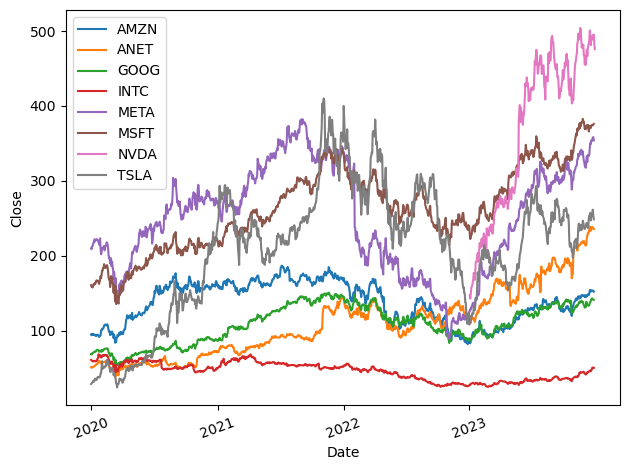

In [33]:
plt.plot(combinedDF['Date'], combinedDF[['AMZN','ANET','GOOG','INTC','META','MSFT','NVDA','TSLA']])

plt.xlabel('Date')
plt.ylabel('Close')
plt.legend(companies)
# plt.axes().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
plt.xticks([0, 253, 505, 756], ['2020', '2021', '2022', '2023'], rotation = 20)
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
plt.tight_layout()
plt.show()

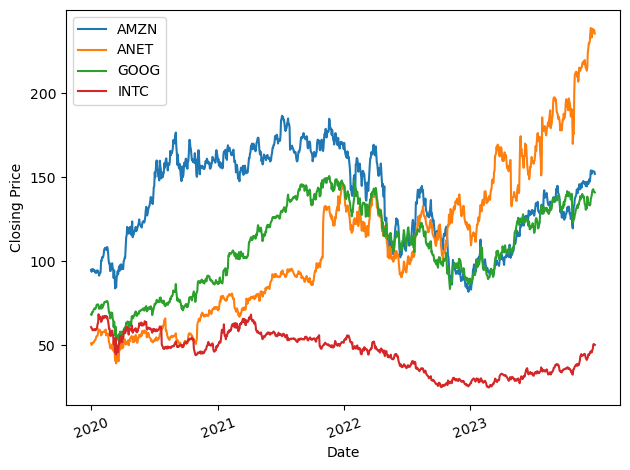

In [34]:
plt.clf()
plt.plot(combinedDF['Date'], combinedDF[['AMZN','ANET','GOOG','INTC']])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend(companies)
# plt.axes().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
plt.xticks([0, 253, 505, 756], ['2020', '2021', '2022', '2023'], rotation = 20)
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
plt.tight_layout()
plt.show()

19:43:28 - cmdstanpy - INFO - Chain [1] start processing
19:43:28 - cmdstanpy - INFO - Chain [1] done processing


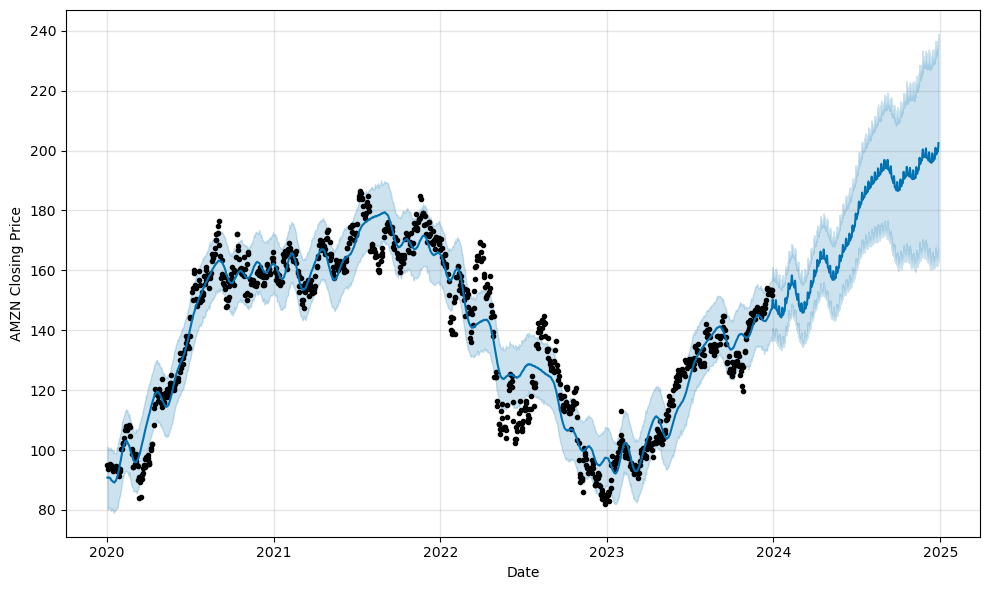

In [35]:
#This is the Amazon Plot
prophet_df_AMZN = amzn_data[['Date','AMZN']]
prophet_df_AMZN = prophet_df_AMZN.rename(columns={'Date': 'ds', 'AMZN': 'y'})
prophet_df_AMZN = prophet_df_AMZN.dropna()
prophet_df_AMZN

prophetModel_AMZN = Prophet()

prophetModel_AMZN.fit(prophet_df_AMZN)

future_trends_df = prophetModel_AMZN.make_future_dataframe(periods=8760, freq='H')

forecast_trends_df = prophetModel_AMZN.predict(future_trends_df)

predictions_df_AMZN = prophetModel_AMZN.plot(forecast_trends_df, xlabel='Date', ylabel='AMZN Closing Price')

19:43:30 - cmdstanpy - INFO - Chain [1] start processing
19:43:30 - cmdstanpy - INFO - Chain [1] done processing


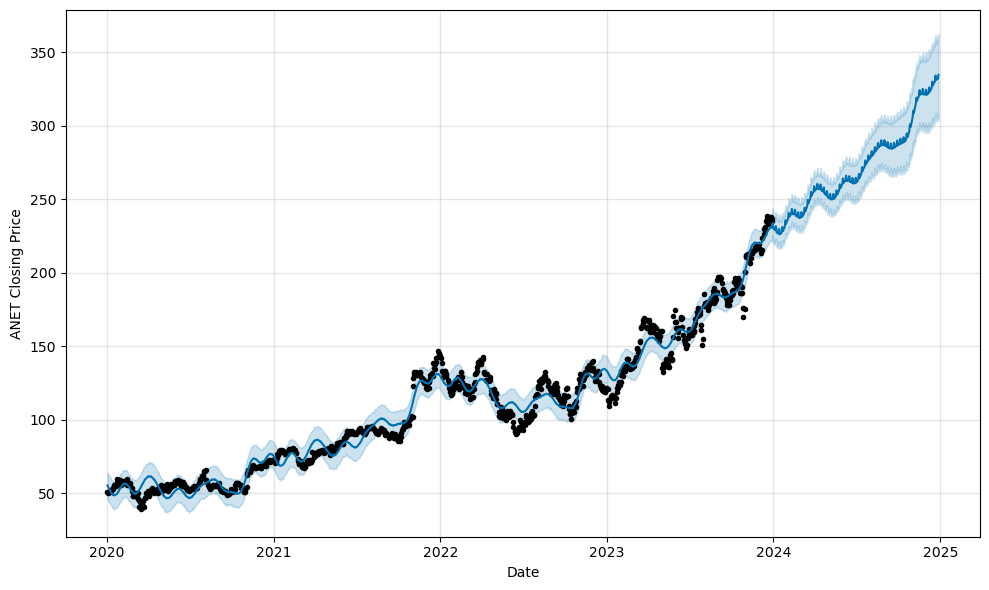

In [36]:
#This is the ANET Plot
prophet_df_ANET = anet_data[['Date','ANET']]
prophet_df_ANET = prophet_df_ANET.rename(columns={'Date': 'ds', 'ANET': 'y'})
prophet_df_ANET = prophet_df_ANET.dropna()
prophet_df_ANET

prophetModel_ANET = Prophet()

prophetModel_ANET.fit(prophet_df_ANET)

future_trends_df = prophetModel_ANET.make_future_dataframe(periods=8760, freq='H')

forecast_trends_df = prophetModel_ANET.predict(future_trends_df)

predictions_df_ANET = prophetModel_ANET.plot(forecast_trends_df, xlabel='Date', ylabel='ANET Closing Price')

19:43:33 - cmdstanpy - INFO - Chain [1] start processing
19:43:33 - cmdstanpy - INFO - Chain [1] done processing


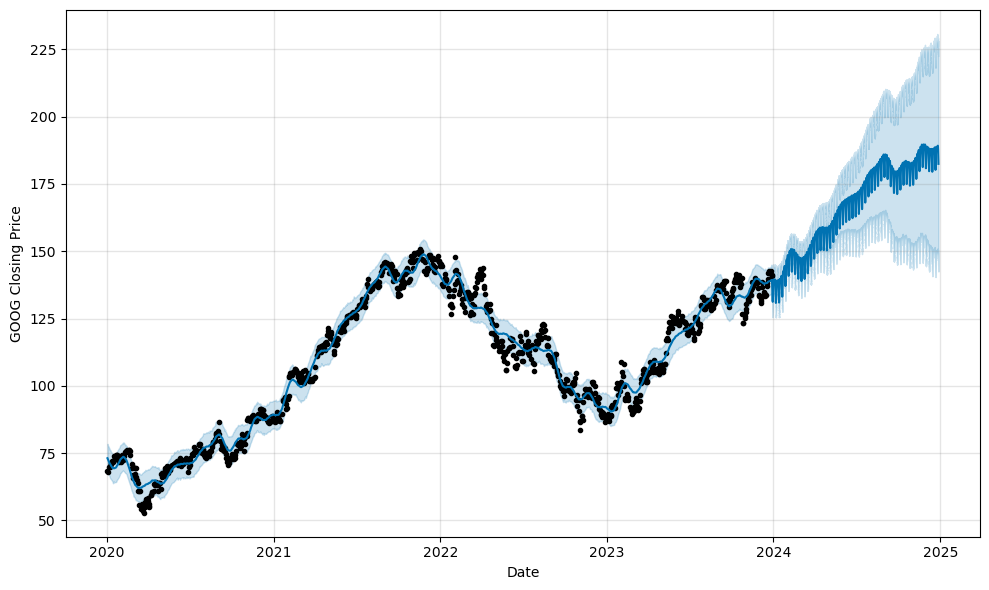

In [37]:
#This is the GOOG Plot
prophet_df_GOOG = goog_data[['Date','GOOG']]
prophet_df_GOOG = prophet_df_GOOG.rename(columns={'Date': 'ds', 'GOOG': 'y'})
prophet_df_GOOG = prophet_df_GOOG.dropna()
prophet_df_GOOG

prophetModel_GOOG = Prophet()

prophetModel_GOOG.fit(prophet_df_GOOG)

future_trends_df = prophetModel_GOOG.make_future_dataframe(periods=8760, freq='H')

forecast_trends_df = prophetModel_GOOG.predict(future_trends_df)

predictions_df_GOOG = prophetModel_GOOG.plot(forecast_trends_df, xlabel='Date', ylabel='GOOG Closing Price')

19:43:36 - cmdstanpy - INFO - Chain [1] start processing
19:43:36 - cmdstanpy - INFO - Chain [1] done processing


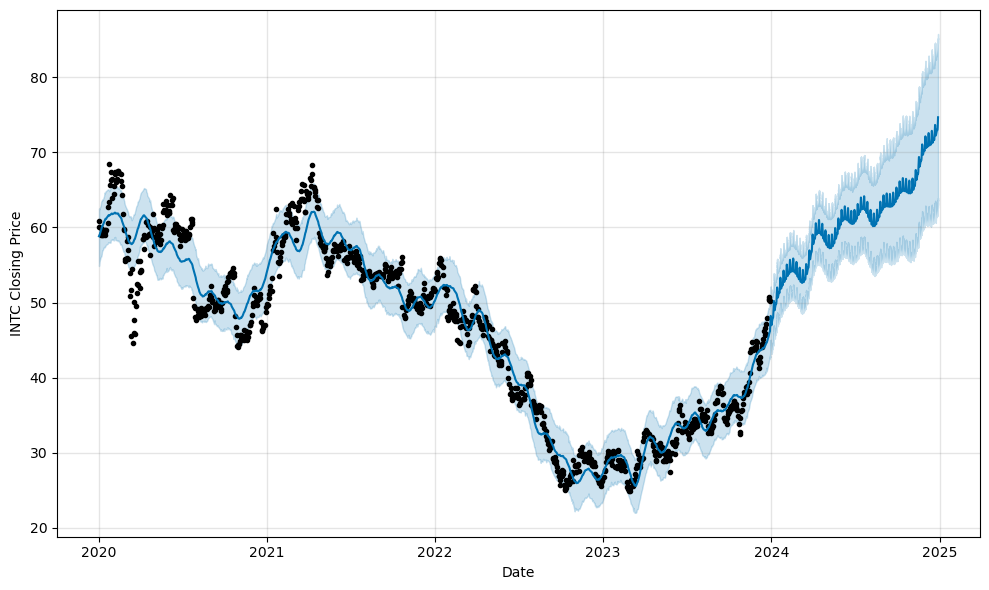

In [38]:
#This is the Intel Plot
prophet_df_INTC = intc_data[['Date','INTC']]
prophet_df_INTC = prophet_df_INTC.rename(columns={'Date': 'ds', 'INTC': 'y'})
prophet_df_INTC = prophet_df_INTC.dropna()
prophet_df_INTC

prophetModel_INTC = Prophet()

prophetModel_INTC.fit(prophet_df_INTC)

future_trends_df = prophetModel_INTC.make_future_dataframe(periods=8760, freq='H')

forecast_trends_df = prophetModel_INTC.predict(future_trends_df)

predictions_df_INTC = prophetModel_INTC.plot(forecast_trends_df, xlabel='Date', ylabel='INTC Closing Price')

19:43:38 - cmdstanpy - INFO - Chain [1] start processing
19:43:38 - cmdstanpy - INFO - Chain [1] done processing


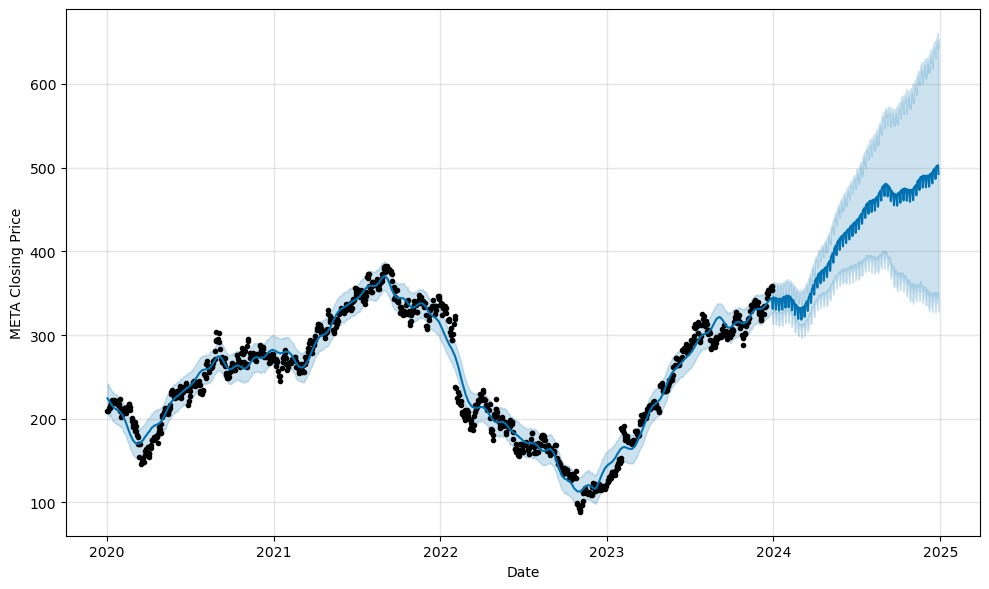

In [39]:
#This is the META Plot
prophet_df_META = meta_data[['Date','META']]
prophet_df_META = prophet_df_META.rename(columns={'Date': 'ds', 'META': 'y'})
prophet_df_META = prophet_df_META.dropna()
prophet_df_META

prophetModel_META = Prophet()

prophetModel_META.fit(prophet_df_META)

future_trends_df = prophetModel_META.make_future_dataframe(periods=8760, freq='H')

forecast_trends_df = prophetModel_META.predict(future_trends_df)

predictions_df_META = prophetModel_META.plot(forecast_trends_df, xlabel='Date', ylabel='META Closing Price')

19:43:41 - cmdstanpy - INFO - Chain [1] start processing
19:43:41 - cmdstanpy - INFO - Chain [1] done processing


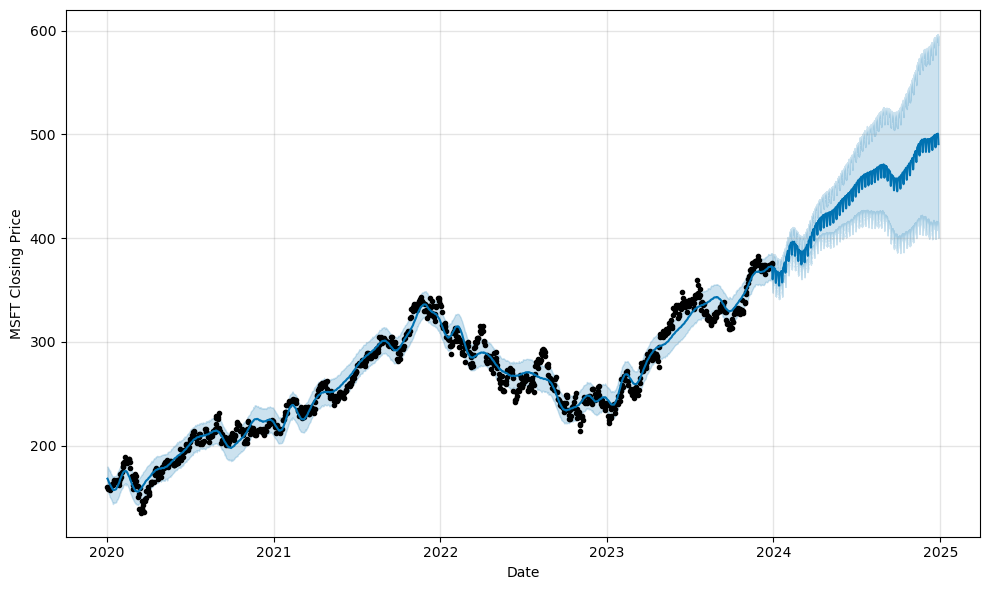

In [40]:
#This is the Microsoft Plot
prophet_df_MSFT = msft_data[['Date','MSFT']]
prophet_df_MSFT = prophet_df_MSFT.rename(columns={'Date': 'ds', 'MSFT': 'y'})
prophet_df_MSFT = prophet_df_MSFT.dropna()
prophet_df_MSFT

prophetModel_MSFT = Prophet()

prophetModel_MSFT.fit(prophet_df_MSFT)

future_trends_df = prophetModel_MSFT.make_future_dataframe(periods=8760, freq='H')

forecast_trends_df = prophetModel_MSFT.predict(future_trends_df)

predictions_df_META = prophetModel_MSFT.plot(forecast_trends_df, xlabel='Date', ylabel='MSFT Closing Price')

19:43:43 - cmdstanpy - INFO - Chain [1] start processing
19:43:44 - cmdstanpy - INFO - Chain [1] done processing


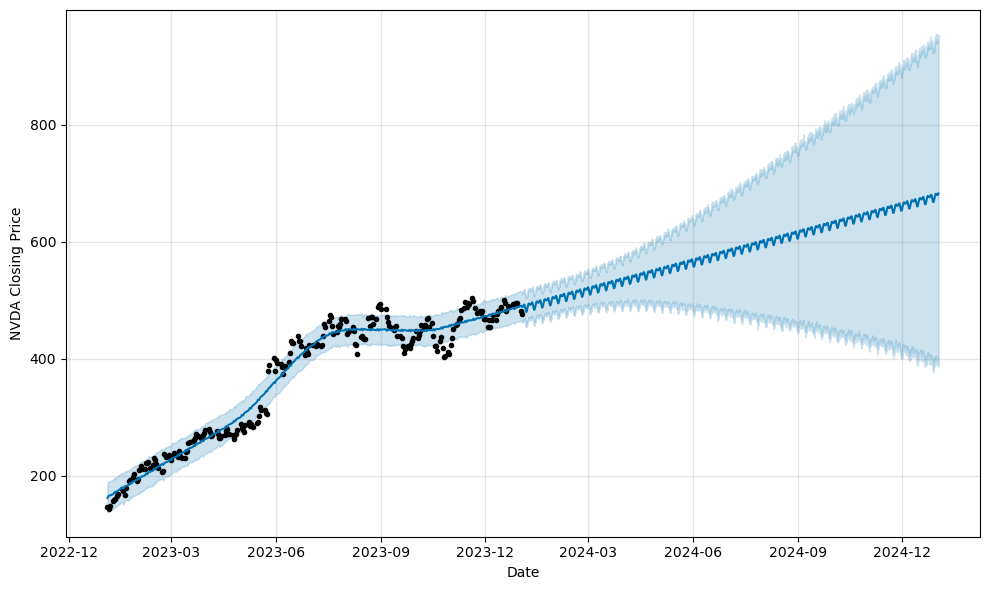

In [41]:
#This is the NVIDIA Plot
prophet_df_NVDA = nvda_data[['Date','NVDA']]
prophet_df_NVDA = prophet_df_NVDA.rename(columns={'Date': 'ds', 'NVDA': 'y'})
prophet_df_NVDA = prophet_df_NVDA.dropna()
prophet_df_NVDA

prophetModel_NVDA = Prophet()

prophetModel_NVDA.fit(prophet_df_NVDA)

future_trends_df = prophetModel_NVDA.make_future_dataframe(periods=8760, freq='H')

forecast_trends_df = prophetModel_NVDA.predict(future_trends_df)

predictions_df_NVDA = prophetModel_NVDA.plot(forecast_trends_df, xlabel='Date', ylabel='NVDA Closing Price')

19:43:46 - cmdstanpy - INFO - Chain [1] start processing
19:43:46 - cmdstanpy - INFO - Chain [1] done processing


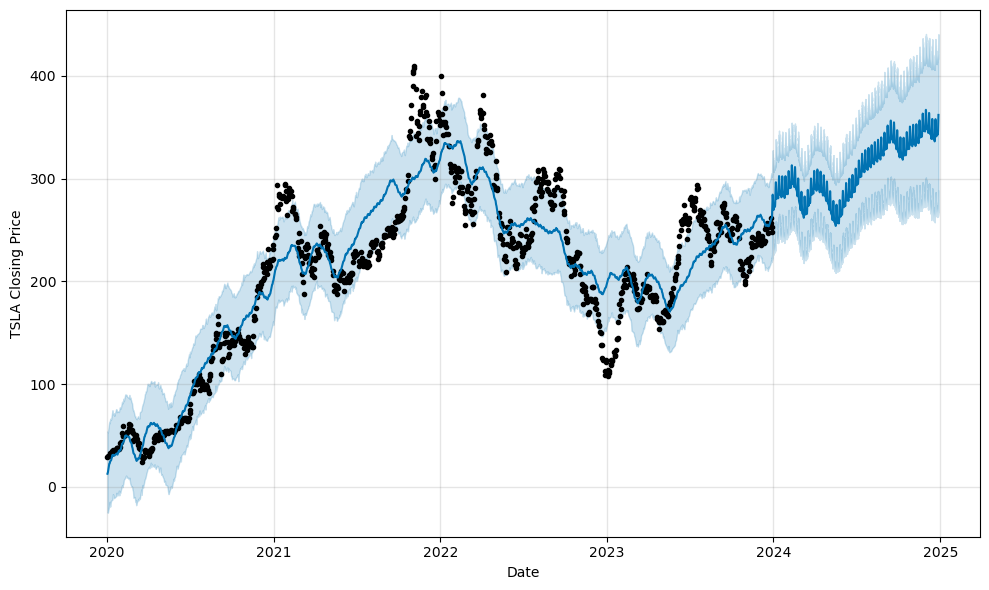

In [42]:
#This is the Tesla Plot
prophet_df_TSLA = tsla_data[['Date','TSLA']]
prophet_df_TSLA = prophet_df_TSLA.rename(columns={'Date': 'ds', 'TSLA': 'y'})
prophet_df_TSLA = prophet_df_TSLA.dropna()
prophet_df_TSLA

prophetModel_TSLA = Prophet()

prophetModel_TSLA.fit(prophet_df_TSLA)

future_trends_df = prophetModel_TSLA.make_future_dataframe(periods=8760, freq='H')

forecast_trends_df = prophetModel_TSLA.predict(future_trends_df)

predictions_df_TSLA = prophetModel_TSLA.plot(forecast_trends_df, xlabel='Date', ylabel='TSLA Closing Price')